In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
!pip install cufflinks
import cufflinks as cf

     -------------------------------------- 81.7/81.7 kB 458.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68725 sha256=3f31badec88b14ab0295c9521bbf88e2d7d5afeed2566cfa8488512924608602
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\b1\8f\ec\b76ac80a14f3f5f59643cbc2eee7d78690b1bd158279f299dd
Successfully built cufflinks


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [7]:
!pip install catboost
!pip install xgboost

     -------------------------------------- 101.1/101.1 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 47.1/47.1 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 99.8/99.8 MB 3.3 MB/s eta 0:00:00


In [8]:
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [9]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [10]:
data = pd.read_csv("heart.csv")
data.head(950)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
data.shape

(303, 14)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


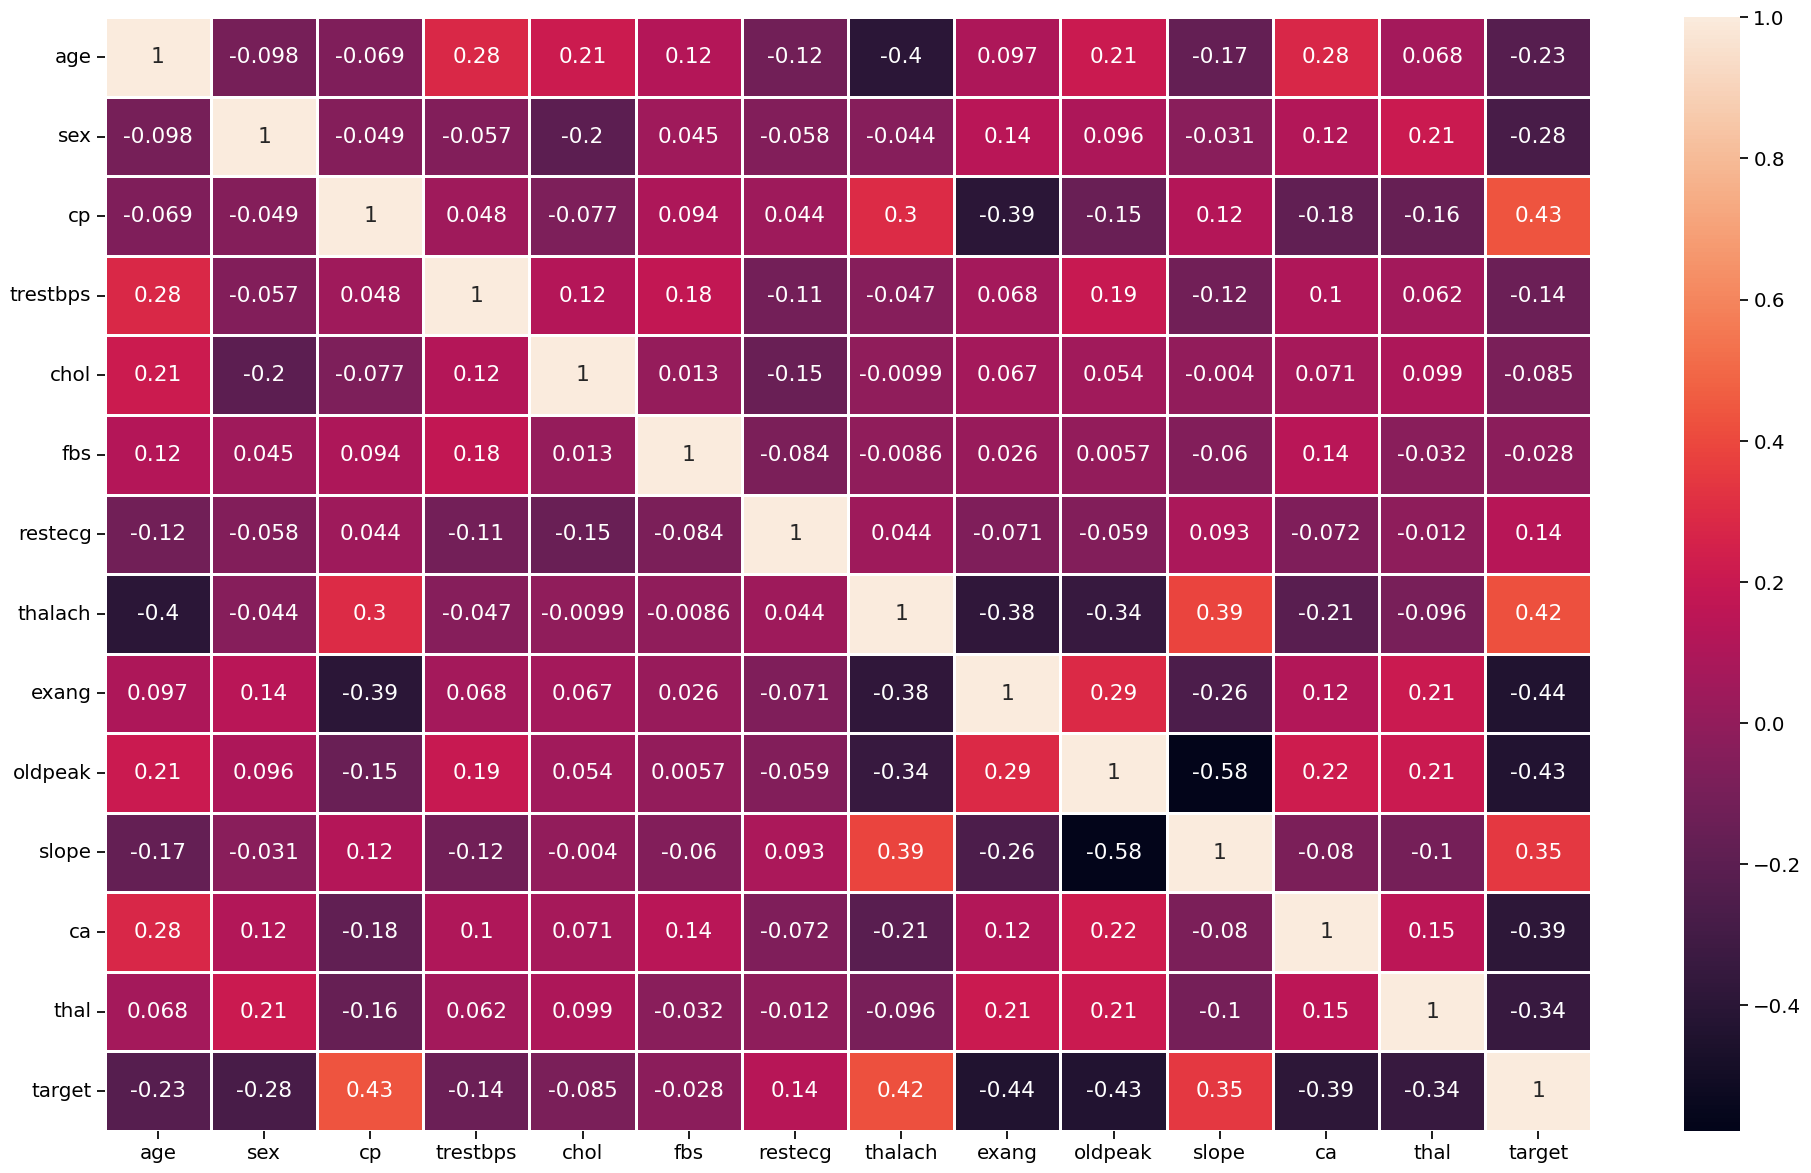

In [14]:
plt.figure(figsize = (20,12))
sns.set_context('notebook', font_scale = 1.3)
sns.heatmap(data.corr(),annot = True, linewidth = 2)
plt.tight_layout()

<Axes: title={'center': 'Correlation with the ChestPain feature'}>

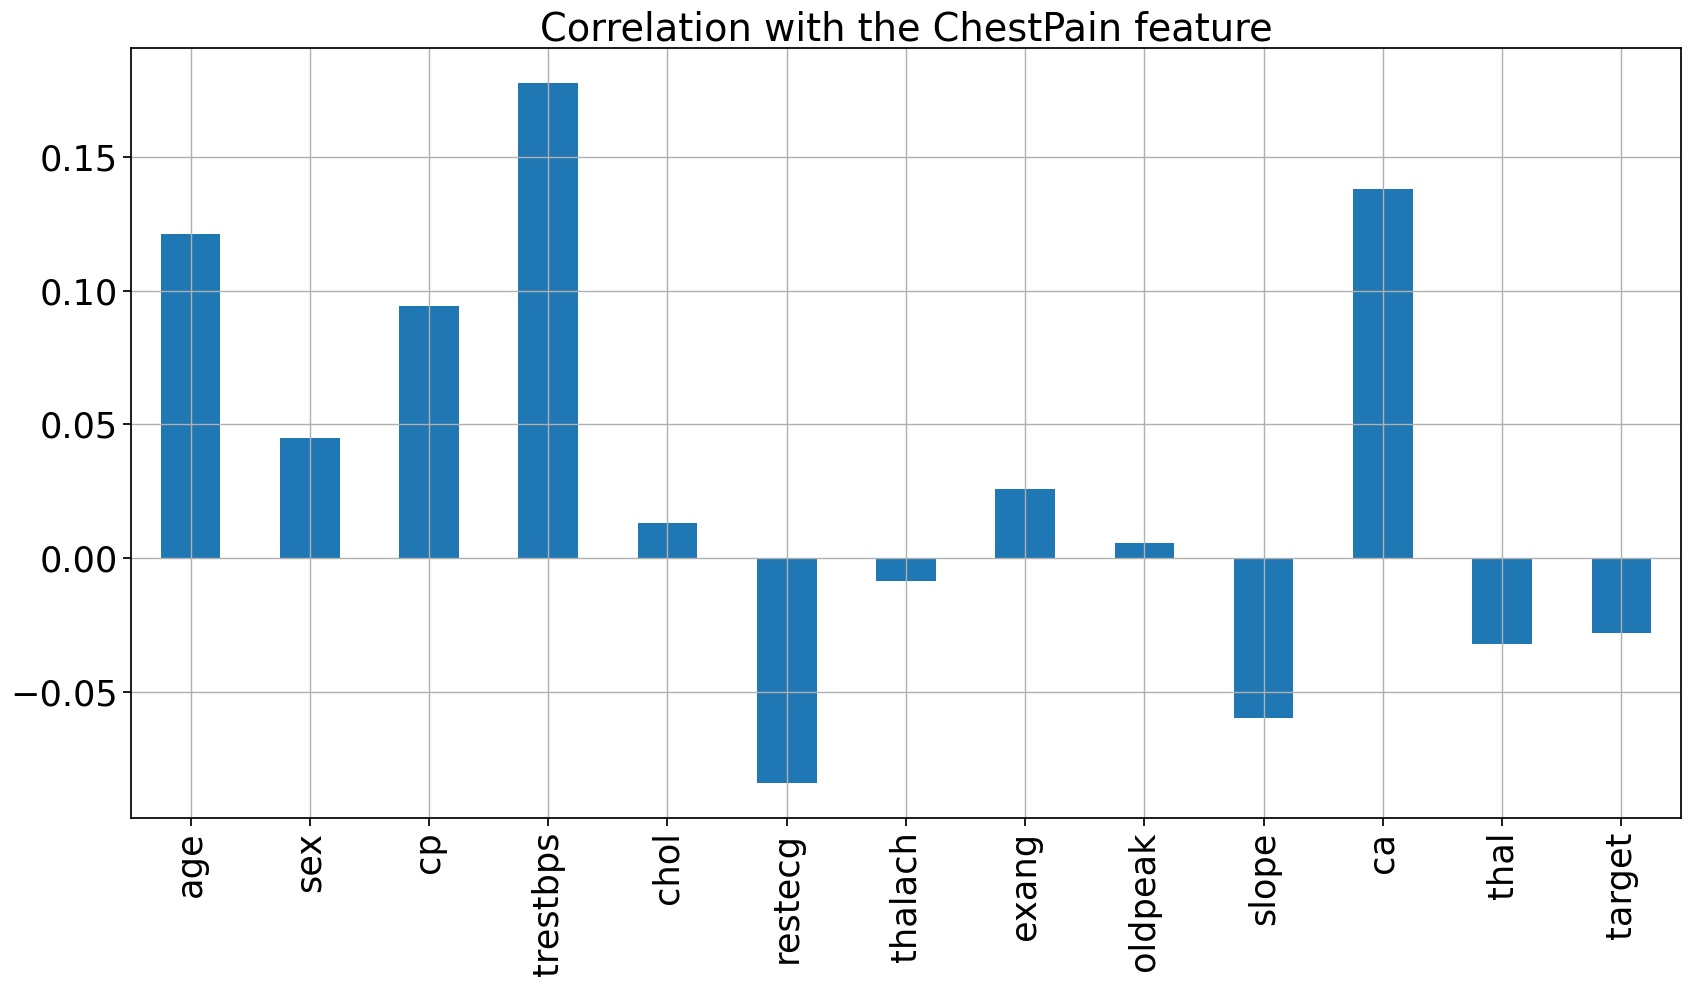

In [18]:
sns.set_context('notebook',font_scale = 2.3)
data.drop('fbs', axis = 1).corrwith(data.fbs).plot(kind = 'bar', grid = True, figsize= (20,10), title ="Correlation with the ChestPain feature")


In [19]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(25,12))

<Figure size 2500x1200 with 0 Axes>

<Figure size 2500x1200 with 0 Axes>

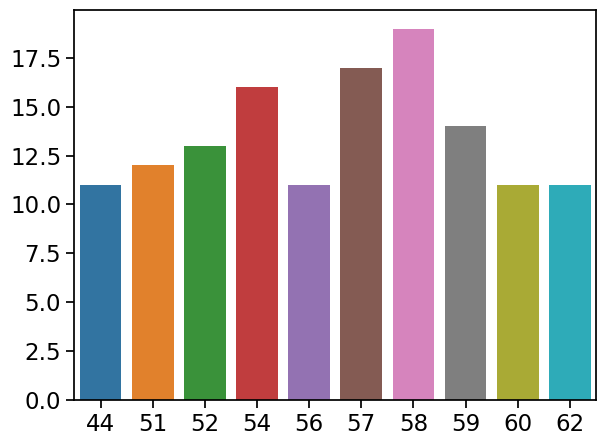

In [22]:
sns.set_context("notebook",font_scale=1.5)
sns.barplot(x = data.age.value_counts()[:10].index, y = data.age.value_counts()[:10].values)
plt.tight_layout()

In [23]:
minage = min(data.age)
maxage = max(data.age)
meanage = data.age.mean()
print('min age:',minage)
print('max age:',maxage)
print('mean age:',meanage)

min age: 29
max age: 77
mean age: 54.366336633663366


In [24]:
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Elder = data[(data.age>55)]

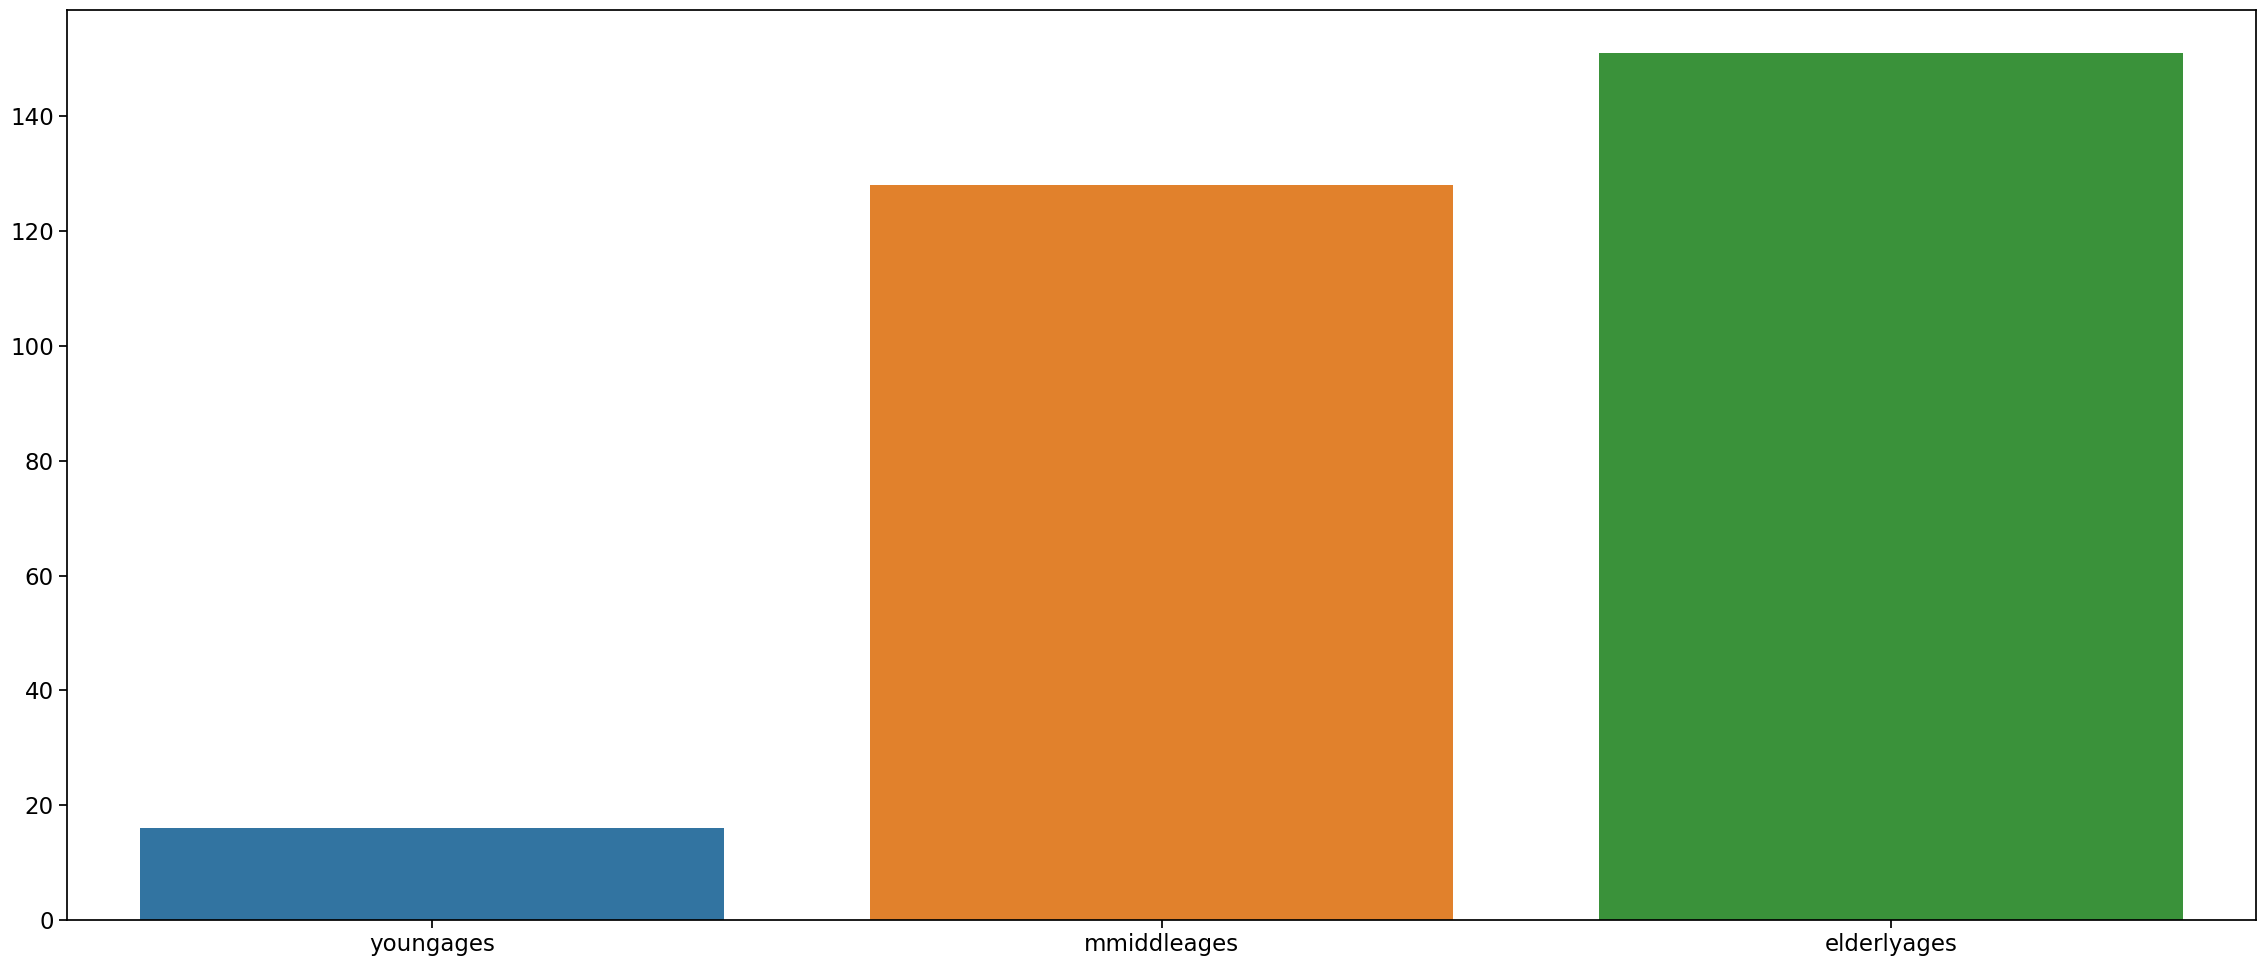

In [26]:
plt.figure(figsize = (23,10))
sns.set_context('notebook', font_scale = 1.5)
sns.barplot(x = ['youngages','mmiddleages','elderlyages'], y=[len(Young), len(Middle),len(Elder)])
plt.tight_layout()

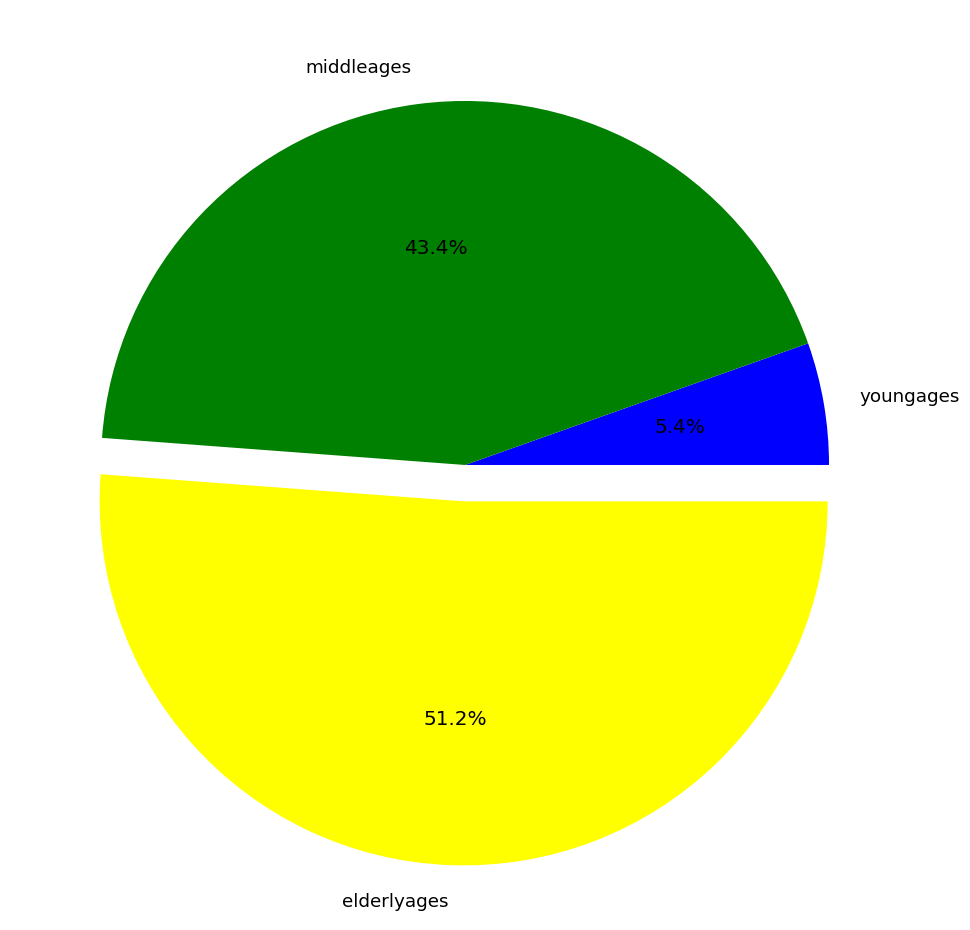

In [31]:
colors = ['blue', 'green','yellow']
explode = [0,0,0.1]
plt.figure(figsize = (10,10))
sns.set_context('notebook', font_scale =1.2)
plt.pie([len(Young), len(Middle), len(Elder)], labels=['youngages', 'middleages', 'elderlyages'], explode=explode, colors= colors, autopct='%1.1f%%')
plt.tight_layout()

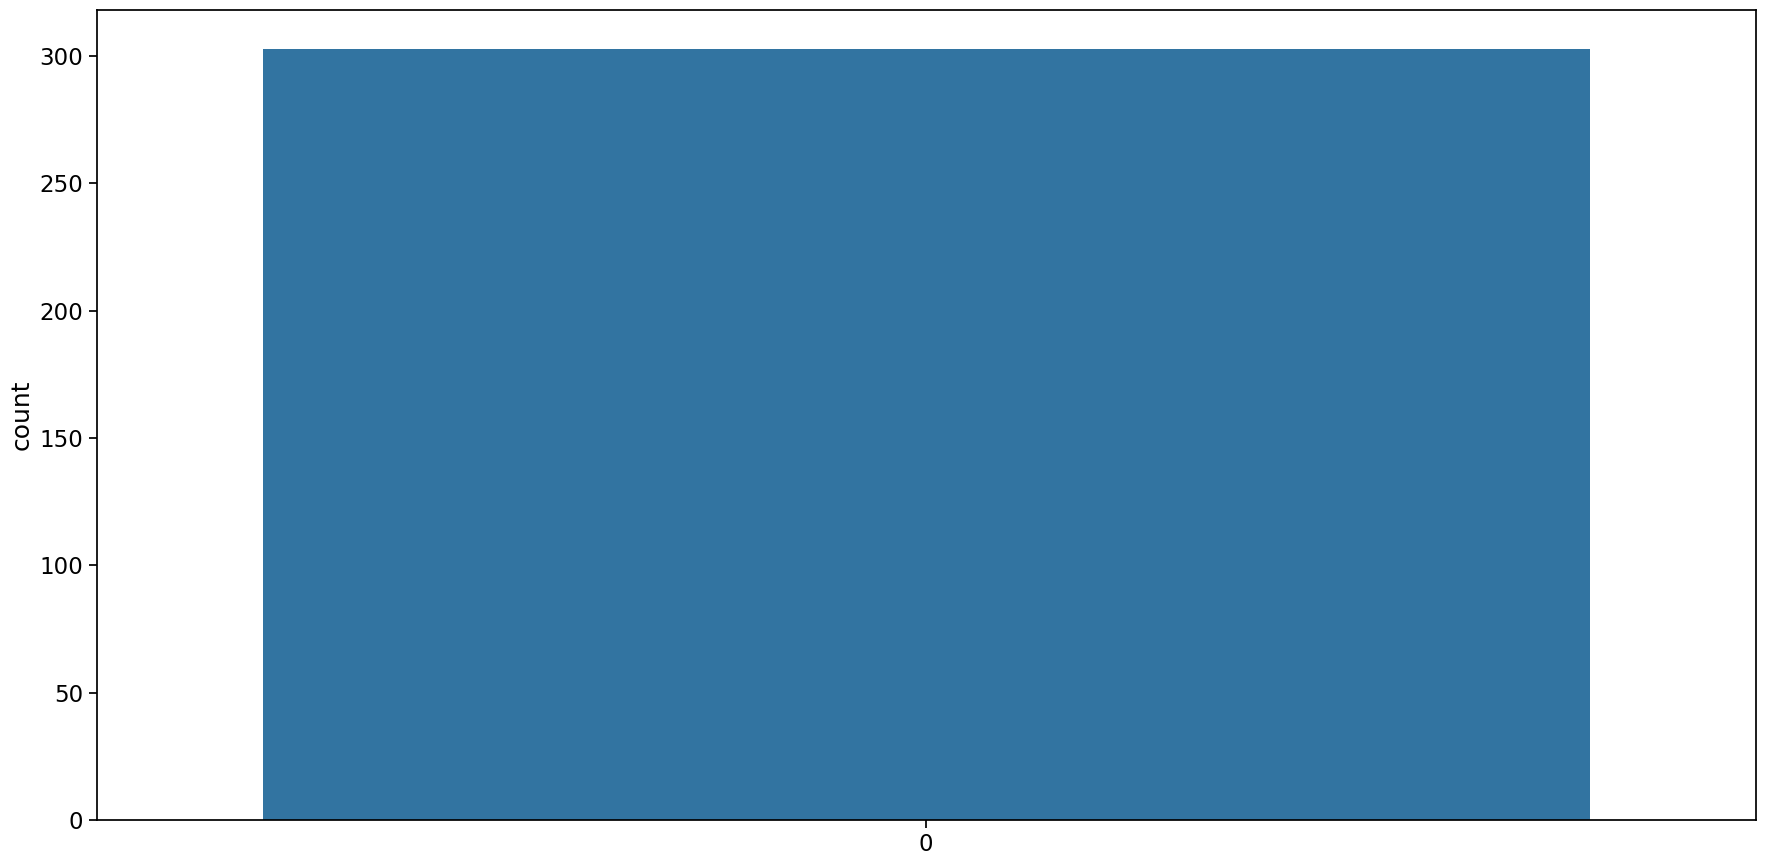

In [33]:
plt.figure(figsize = (18,9))
sns.set_context("notebook", font_scale = 1.5)
sns.countplot(data['sex'])
plt.tight_layout()

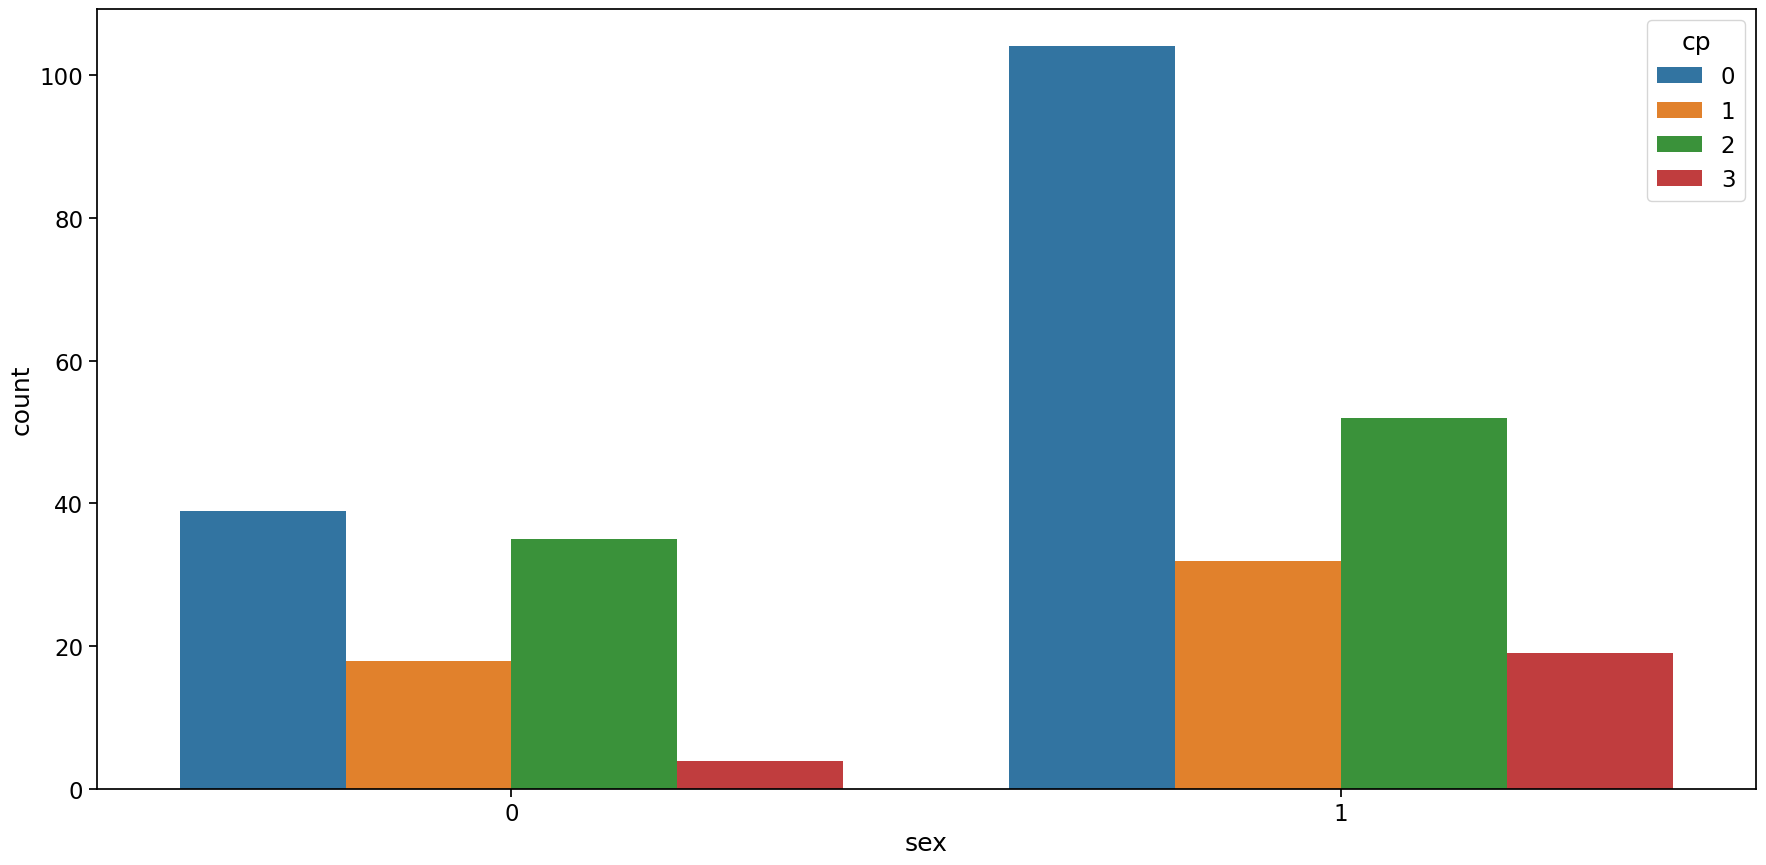

In [35]:
plt.figure(figsize = (18,9))
sns.set_context("notebook", font_scale = 1.5)
sns.countplot(x = data['sex'], hue = data["cp"])
plt.tight_layout()

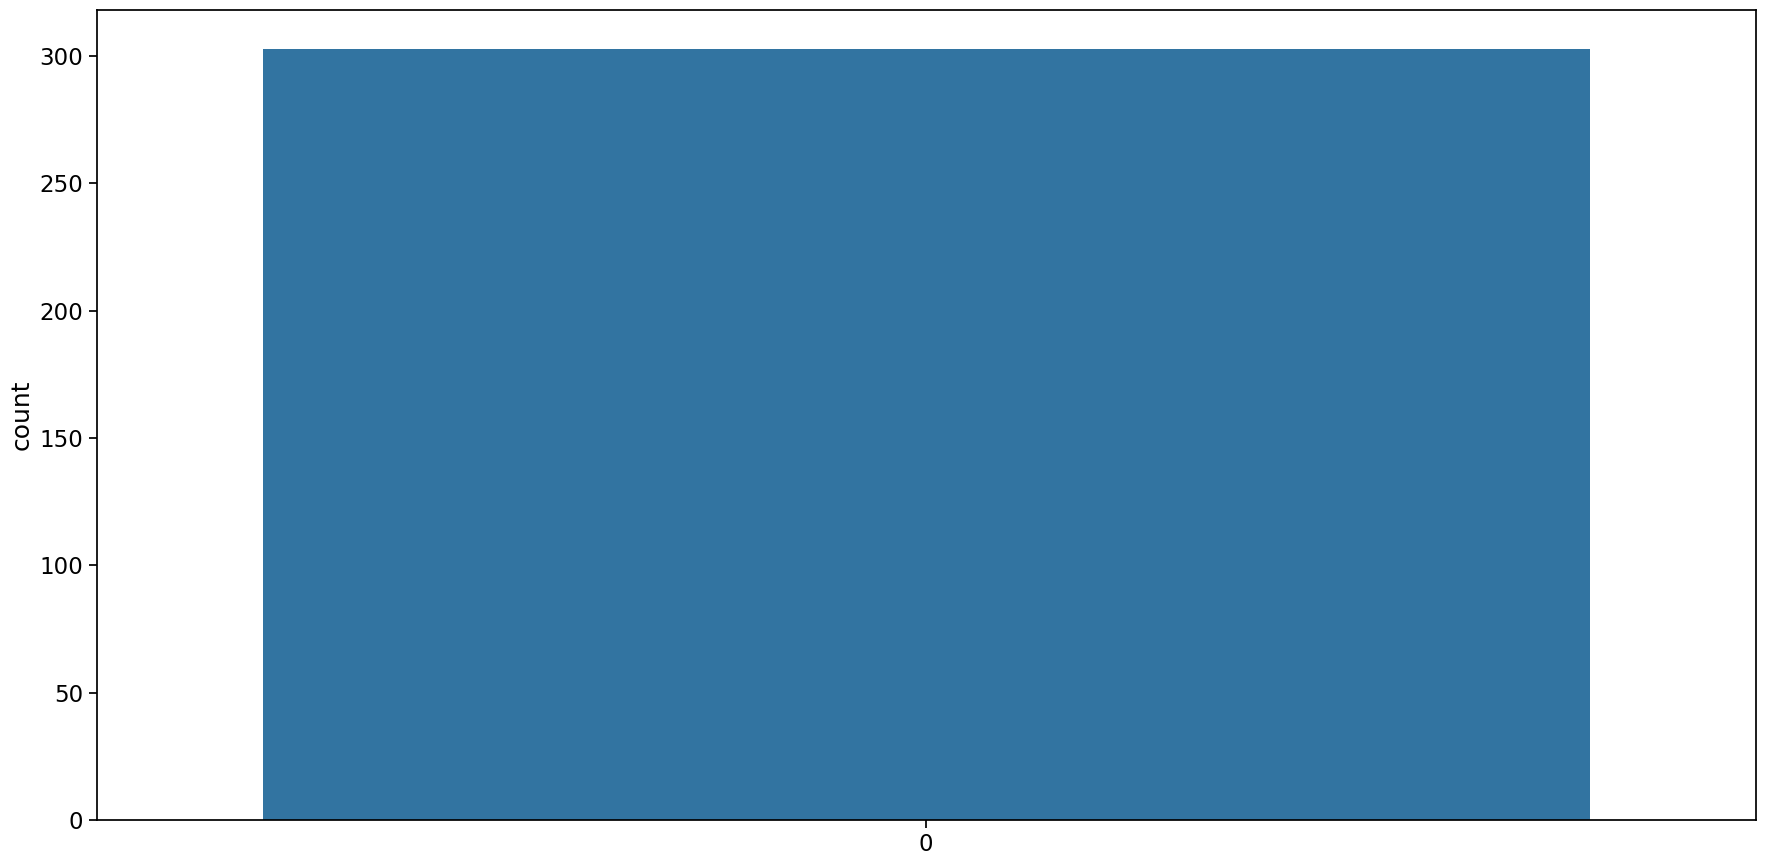

In [36]:
plt.figure(figsize = (18,9))
sns.set_context("notebook", font_scale = 1.5)
sns.countplot(data['cp'])
plt.tight_layout()

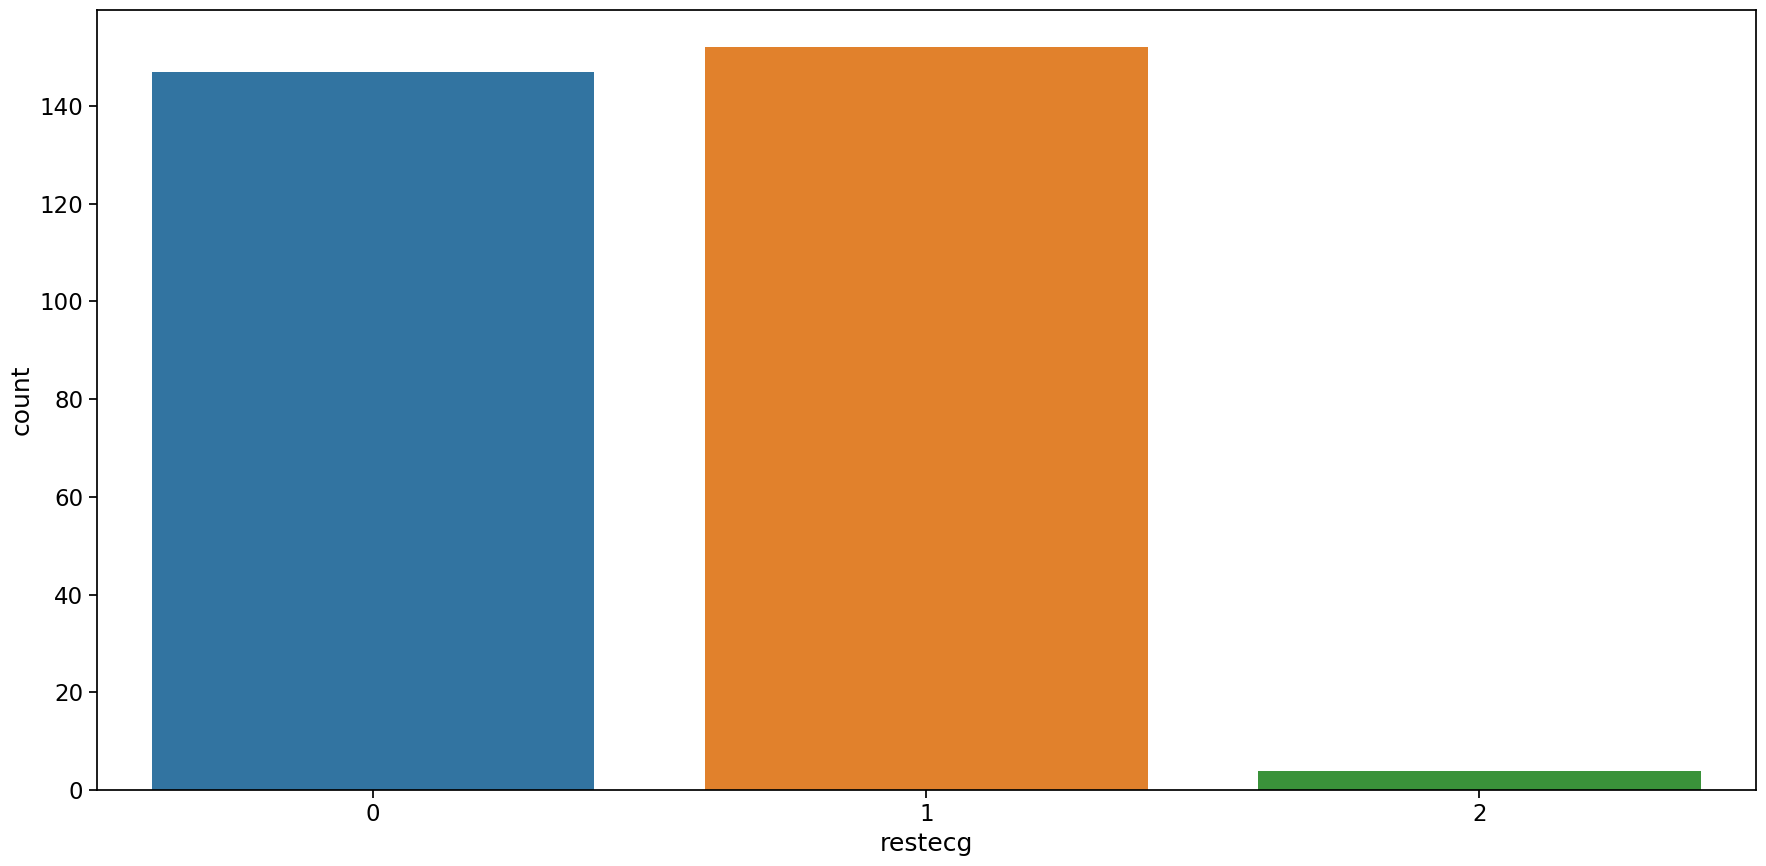

In [37]:
plt.figure(figsize = (18,9))
sns.set_context("notebook", font_scale = 1.5)
sns.countplot(x = data['restecg'])
plt.tight_layout()

In [40]:
categorical_val = []
continuous_val = []
for column in data.columns:
    print("---------------")
    print(f"{column} : {data[column].unique()}")
    
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

---------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
---------------
sex : [1 0]
---------------
cp : [3 2 1 0]
---------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
---------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322

In [42]:
categorical_val.remove("ca")
dfs = pd.get_dummies(data, columns = categorical_val)
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,target_0,target_1
0,63,145,233,150,2.3,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,37,130,250,187,3.5,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
2,41,130,204,172,1.4,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
3,56,120,236,178,0.8,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
4,57,120,354,163,0.6,0,1,0,1,0,...,1,0,0,1,0,0,1,0,0,1
5,57,140,192,148,0.4,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1


In [46]:
categorical_val.remove("target")
dfs = pd.get_dummies(data, columns = categorical_val)
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_0,sex_1,cp_0,...,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,57,120,354,163,0.6,0,1,1,0,1,...,0,0,1,0,0,1,0,0,1,0
5,57,140,192,148,0.4,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0


In [44]:
sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dfs[col_to_scale] = sc.fit_transform(dfs[col_to_scale])
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,target_0,target_1
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,1,0,1,0,...,1,0,0,1,0,0,1,0,0,1
5,0.290464,0.478391,-1.048678,-0.072018,-0.551783,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1


In [47]:
X = dfs.drop('target', axis = 1)
y= dfs.target

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 42)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
#K-Nearest Neighbor Machine Learning Algorithm
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)
print(accuracy_score(y_test,y_pred1))


0.6923076923076923


In [53]:
# Hyperparameter Optimization

test_score = []
neighbors = range(1, 25)

In [54]:
for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test_score.append(accuracy_score(y_test, model.predict(X_test)))


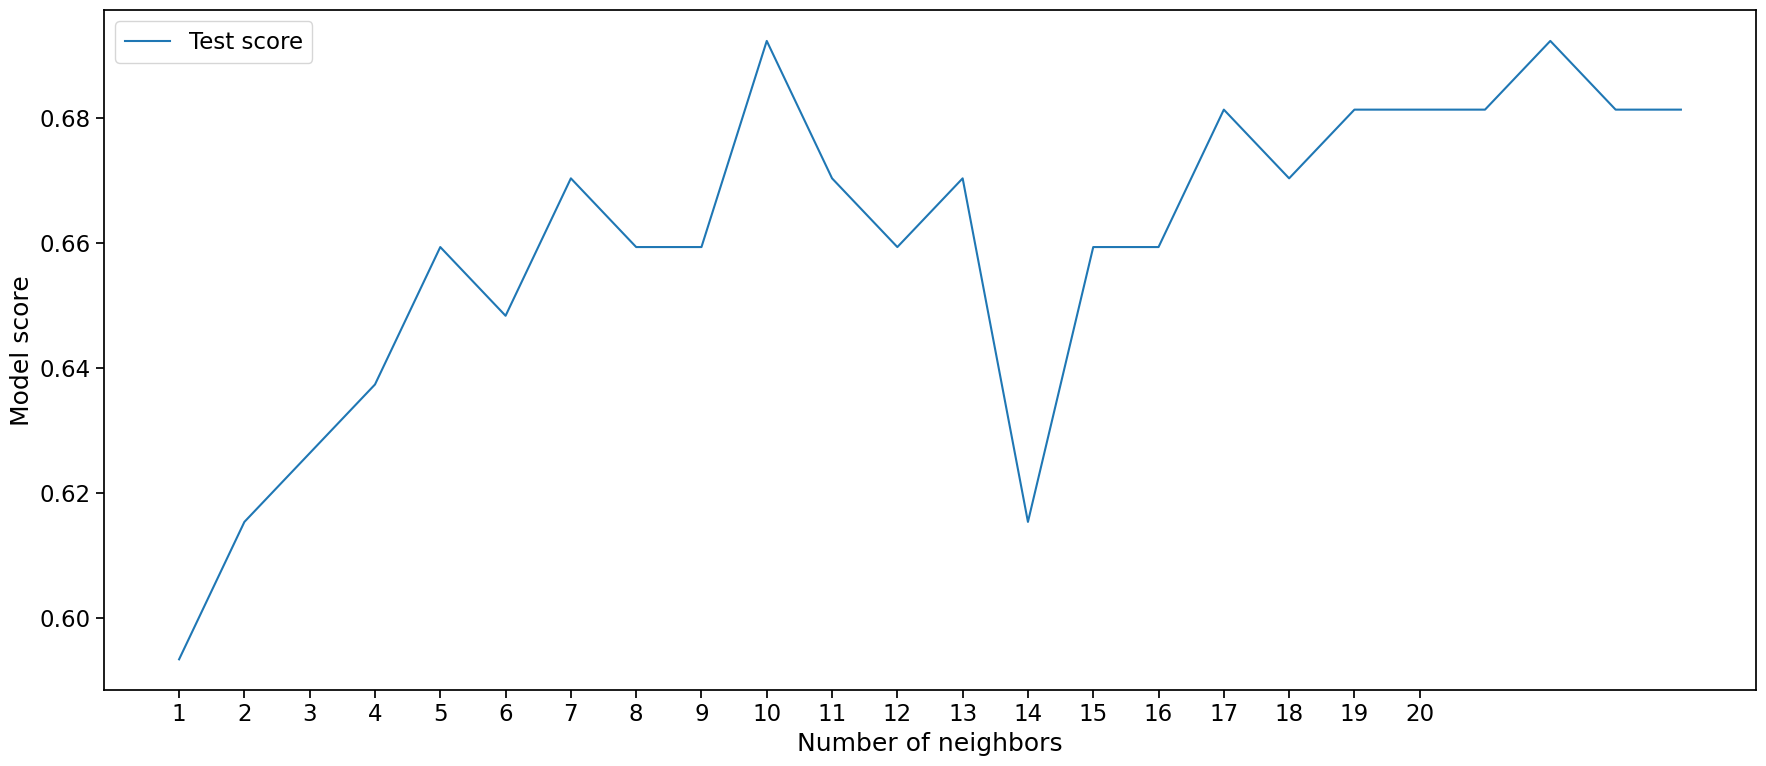

In [55]:
plt.figure(figsize=(18, 8))
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.tight_layout()

In [56]:
#K-Nearest Neighbor Machine Learning Algorithm
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.6813186813186813


In [57]:
test_score = accuracy_score(y_test, knn.predict(X_test)) * 100
train_score = accuracy_score(y_pred1, knn.predict(X_test)) * 100

results_df = pd.DataFrame(data=[["K-Nearest Neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,K-Nearest Neighbors,100.0,68.131868
